In [85]:
# Import libraries
import pandas as pd
df2 = pd.read_csv('classification_lab_data.csv')
pd.options.display.max_columns = 50
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

In [6]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0


In [7]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000
mean,167825.729405,1.603608,1.856786,1.550773,35.523230,-0.014959,-0.134839,-0.165632,-0.217092,-0.261344,-0.285845,51589.034710,49521.698112,4.747483e+04,43796.589775,40748.049169,39226.852411,5687.720113,6.019571e+03,5253.322805,4824.490687,4825.033793,5245.642943,0.221176
std,129915.115993,0.489158,0.791939,0.522431,9.253986,1.120903,1.193044,1.193515,1.168719,1.133016,1.150394,74104.132627,71551.215125,7.001082e+04,64927.450125,61257.537699,60075.536736,16698.506577,2.454136e+04,17967.028860,15730.753527,15596.580167,17795.775322,0.415047
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-67526.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3577.500000,2958.000000,2.718000e+03,2392.500000,1801.000000,1280.000000,1000.000000,8.585000e+02,395.000000,300.000000,269.500000,125.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22472.000000,21290.000000,2.022300e+04,19145.000000,18227.000000,17175.000000,2110.000000,2.012000e+03,1809.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67767.000000,64635.500000,6.096200e+04,55418.000000,50581.000000,49434.500000,5020.000000,5.000000e+03,4561.000000,4089.000000,4029.500000,4008.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


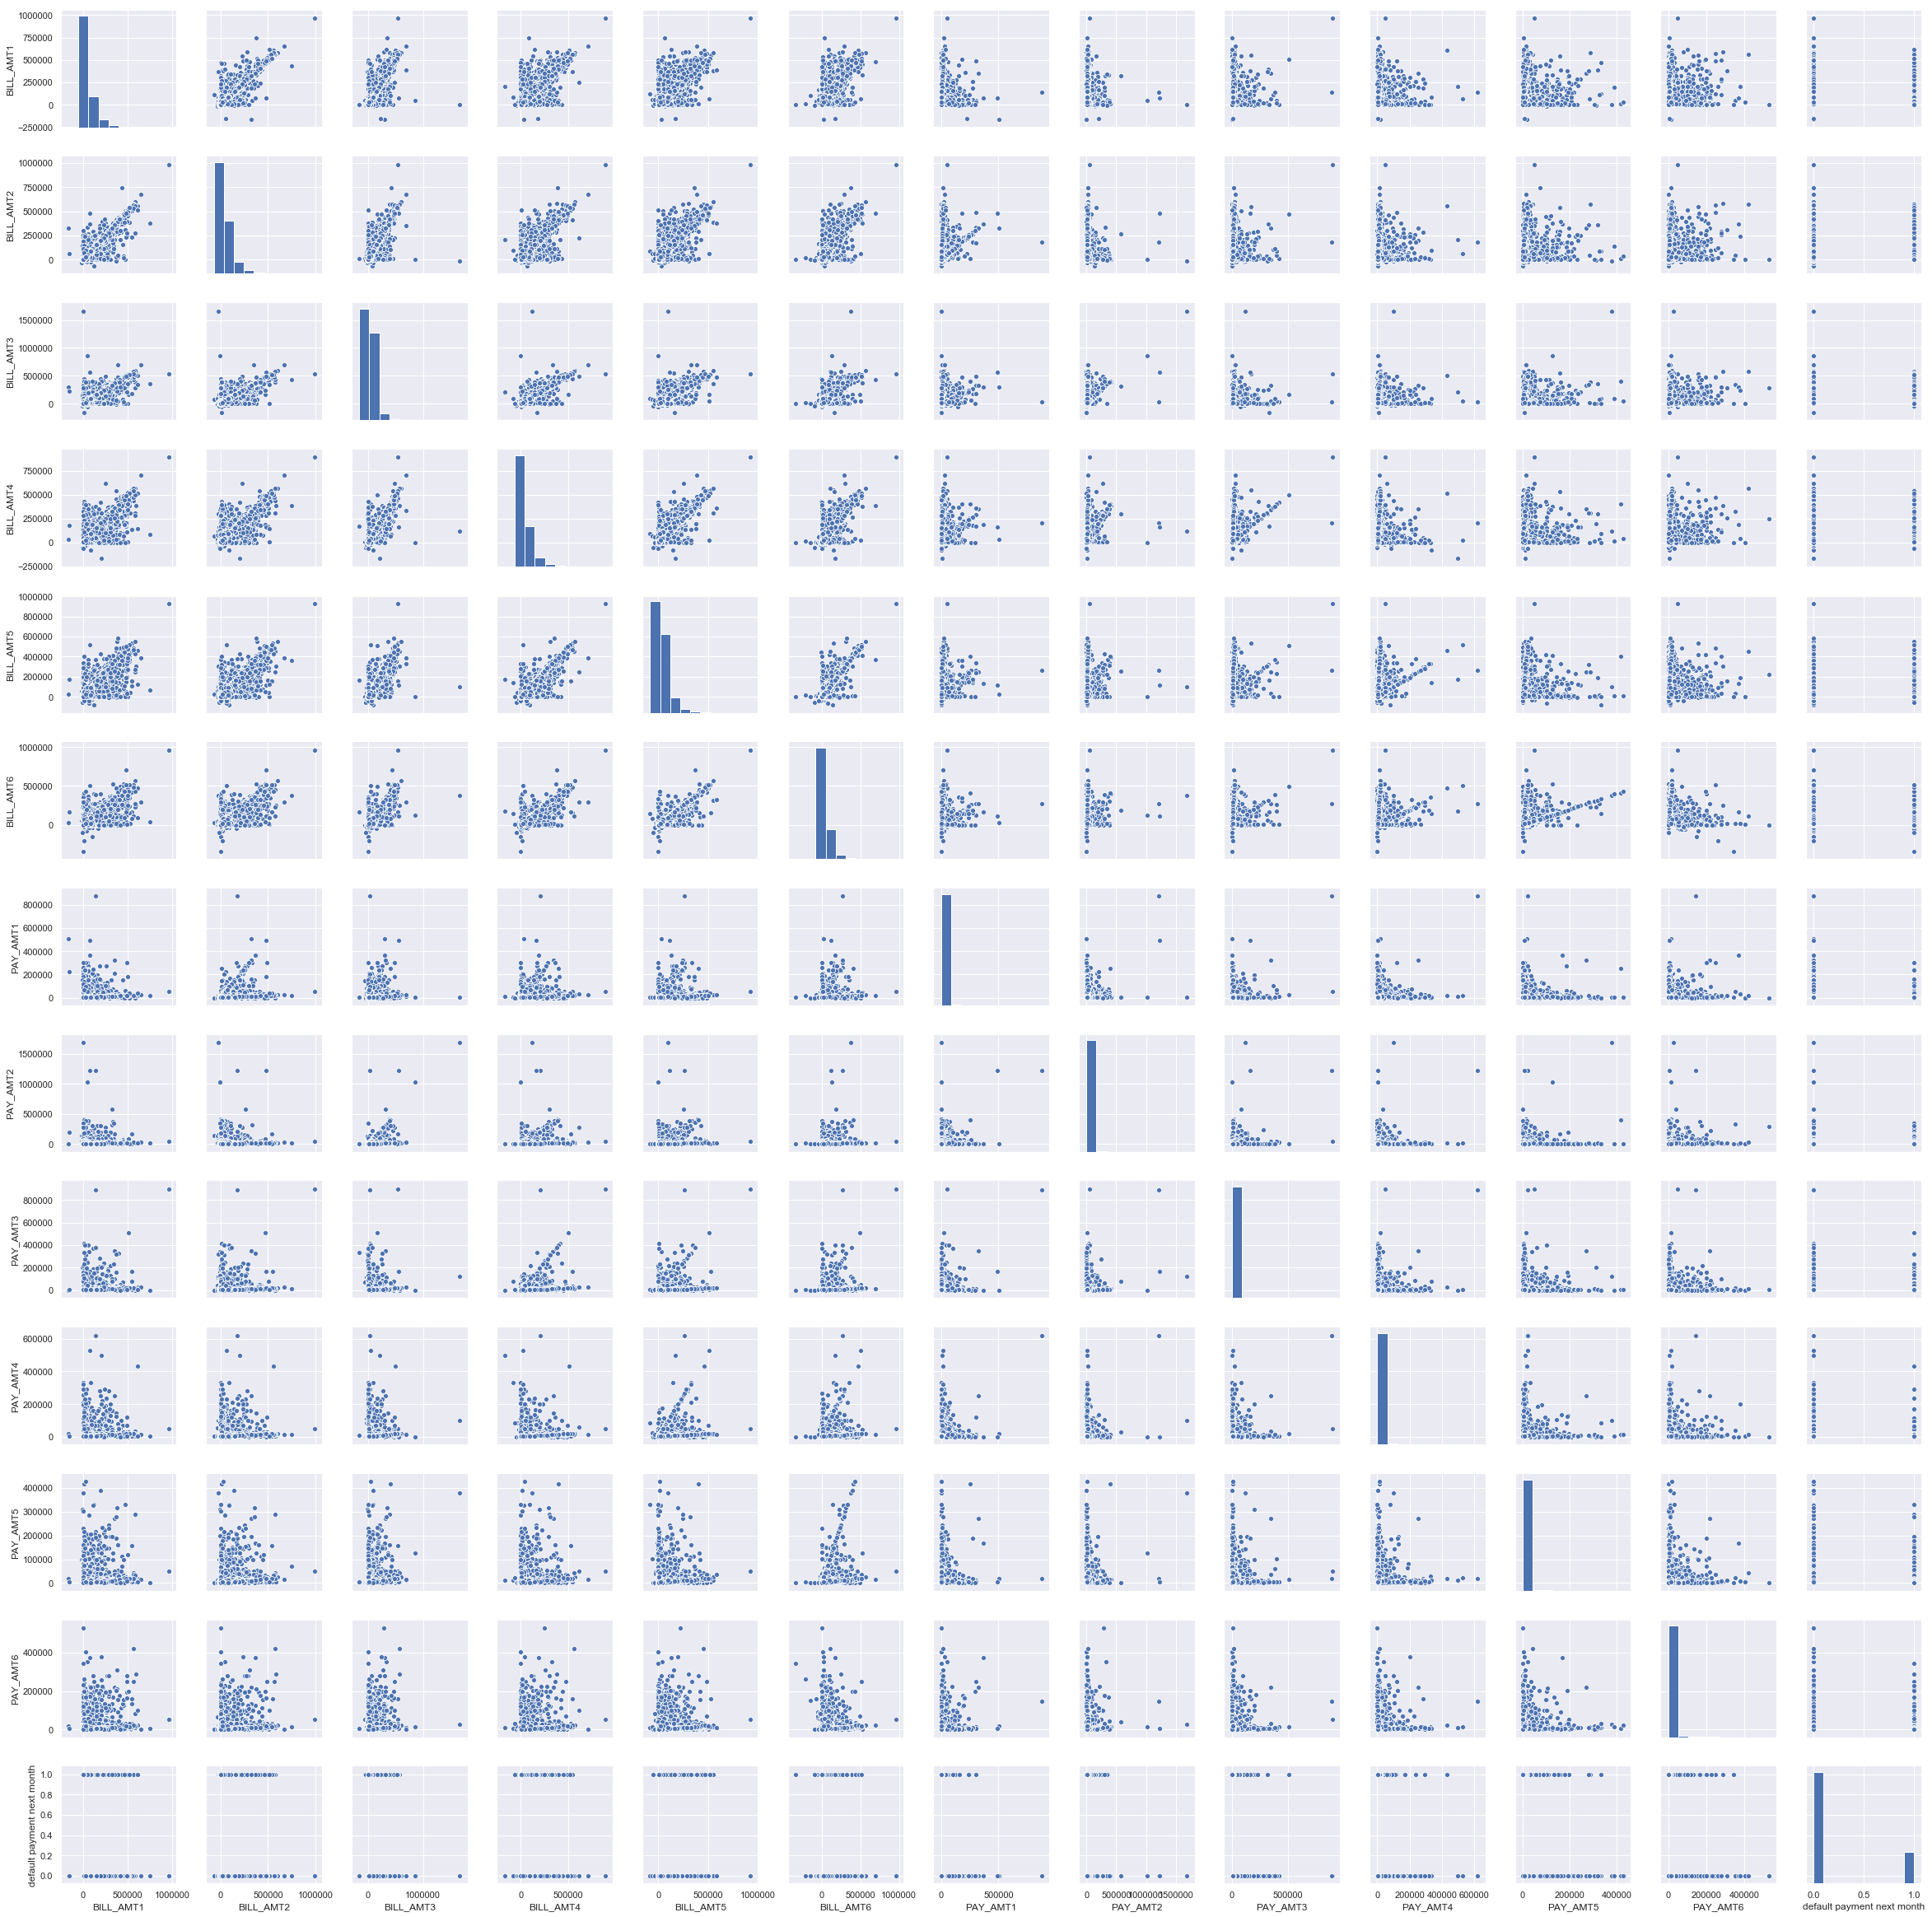

In [10]:
#use pairplot to look at selected variables with pairwise scatterplot. Looking for non-linear shapes to engineer.
sns.set()
cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default payment next month']
sns.pairplot(df[cols], height = 2.5)
plt.show();

In [70]:
df2.rename(columns ={'default payment next month':'default', 'PAY_0':'STAT_SEP', 'PAY_2':'STAT_AUG','PAY_3':'STAT_JUL','PAY_4':'STAT_JUN','PAY_5':'STAT_MAY','PAY_6':'STAT_APR','BILL_AMT1':'BILL_SEP','BILL_AMT2':'BILL_AUG','BILL_AMT3':'BILL_JUL','BILL_AMT4':'BILL_JUN','BILL_AMT5':'BILL_MAY','BILL_AMT6':'BILL_APR','PAY_AMT1':'PAID_SEP','PAY_AMT2':'PAID_AUG','PAY_AMT3':'PAID_JUL','PAY_AMT4':'PAID_JUN','PAY_AMT5':'PAID_MAY','PAY_AMT6':'PAID_APR'},inplace=True)
df2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,STAT_SEP,STAT_AUG,STAT_JUL,STAT_JUN,STAT_MAY,STAT_APR,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,default
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0


In [10]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0


In [13]:
categorical = ['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

In [17]:

for col in categorical:
    print(col + ':' + str(sorted(df[col].unique())))

SEX:[1, 2]
EDUCATION:[0, 1, 2, 3, 4, 5, 6]
MARRIAGE:[0, 1, 2, 3]
PAY_0:[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2:[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_3:[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_4:[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_5:[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_6:[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]


## Education

In [110]:
len(dfOutlier_EDU)

275

In [111]:
# if EDUCATION = 0, 5 or 6, tend to have 0 default
dfOutlier_EDU

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
139,280000,2,6,3,38,0,0,0,-1,-1,-1,286469,293875,296257,232,-94,143864,8024,8034,232,94,145935,5000,0
223,200000,2,5,2,27,0,0,0,0,0,0,98761,85583,84398,88612,86159,89751,4000,3000,3000,3338,5000,4000,0
233,180000,2,5,1,54,0,0,0,0,0,0,88545,90403,92245,94082,96050,97963,3279,3343,3366,3483,3507,3628,0
240,260000,2,5,1,41,-1,-1,-1,-1,-1,-1,2398,2289,3593,5332,1994,5782,2294,3601,5348,2802,5801,2013,0
243,150000,2,5,2,36,0,0,0,0,0,0,144833,141559,80614,110343,64419,18536,6041,13013,64442,3000,2000,4000,0
281,200000,2,5,2,34,-1,-1,-1,-1,-1,-1,13943,8943,1662,2553,1977,3175,8964,1662,2553,1977,3175,1804,0
381,180000,2,5,2,34,1,-1,-1,-2,-2,-2,0,149,0,0,0,0,149,0,0,0,0,0,0
504,200000,2,5,2,32,0,0,0,0,0,0,64059,66113,15421,15728,16057,16398,3372,1246,553,572,597,2000,0
524,30000,1,5,2,24,0,0,0,0,2,2,21652,22656,23804,25668,24887,0,1369,1517,2381,0,0,0,0
590,100000,2,5,1,54,0,0,0,0,0,0,95980,99056,100415,102666,63913,65246,4057,3232,3275,2290,2365,2382,0


In [34]:
# create independent dataframes of outliers, to facilitate analytics
dfOutlier_EDU = df[df['EDUCATION'].isin([0,5,6])]
dfOutlier_MARIT = df[df['MARRIAGE'].isin([0])]
dfOutlier_PAY_0 = df[df['PAY_0'].isin([-2,0])]
dfOutlier_PAY_2 = df[df['PAY_2'].isin([-2,0])]
dfOutlier_PAY_3 = df[df['PAY_3'].isin([-2,0])]
dfOutlier_PAY_4 = df[df['PAY_4'].isin([-2,0])]
dfOutlier_PAY_5 = df[df['PAY_5'].isin([-2,0])]
dfOutlier_PAY_6 = df[df['PAY_6'].isin([-2,0])]

dfOutlier_ED.shape,dfOutlier_MARIT.shape, dfOutlier_PAY_0.shape,dfOutlier_PAY_2.shape,dfOutlier_PAY_3.shape,dfOutlier_PAY_4.shape,dfOutlier_PAY_5.shape,dfOutlier_PAY_6.shape,

((275, 24),
 (43, 24),
 (14015, 24),
 (15619, 24),
 (15840, 24),
 (16665, 24),
 (17241, 24),
 (16974, 24))

In [87]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,STAT_SEP,STAT_AUG,STAT_JUL,STAT_JUN,STAT_MAY,STAT_APR,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,default
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0


In [88]:
# create independent dataframes of outliers, to facilitate analytics
#dfOutlier_EDU = df[df['EDUCATION'].isin([0,5,6])]
#dfOutlier_MARIT = df[df['MARRIAGE'].isin([0])]
dfOutlier_PAY_0_2 = df[df['STAT_SEP'].isin([-2])]
dfOutlier_PAY_2_2 = df[df['STAT_AUG'].isin([-2])]
dfOutlier_PAY_3_2 = df[df['STAT_JUL'].isin([-2])]
dfOutlier_PAY_4_2 = df[df['STAT_JUN'].isin([-2])]
dfOutlier_PAY_5_2 = df[df['STAT_MAY'].isin([-2])]
dfOutlier_PAY_6_2 = df[df['STAT_APR'].isin([-2])]

dfOutlier_ED.shape,dfOutlier_MARIT.shape, dfOutlier_PAY_0.shape,dfOutlier_PAY_2.shape,dfOutlier_PAY_3.shape,dfOutlier_PAY_4.shape,dfOutlier_PAY_5.shape,dfOutlier_PAY_6.shape,

((275, 24),
 (43, 24),
 (14015, 24),
 (15619, 24),
 (15840, 24),
 (16665, 24),
 (17241, 24),
 (16974, 24))

In [95]:
dfOutlier_PAY_3_2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,STAT_SEP,STAT_AUG,STAT_JUL,STAT_JUN,STAT_MAY,STAT_APR,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,default
6,400000,2,2,2,41,-2,-2,-2,-2,-2,-2,43672,678,330,330,330,330,678,330,330,330,330,330,1
11,20000,1,2,2,23,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
26,360000,2,1,1,32,-2,-2,-2,-2,-1,0,-16,3194,430,1982,211250,215670,3210,436,1991,211250,7762,7823,0
32,140000,2,1,2,27,-1,-1,-2,-2,-2,-2,390,0,0,0,0,0,0,0,0,0,0,2943,0
33,390000,2,3,1,46,-2,-2,-2,-2,-2,-2,14315,7097,6548,8976,909,17682,7097,6548,8976,909,17682,12710,0


In [94]:
dfOutlier_PAY_5_2.tail(25)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,STAT_SEP,STAT_AUG,STAT_JUL,STAT_JUN,STAT_MAY,STAT_APR,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,default
23850,180000,2,2,1,44,-2,-2,-2,-2,-2,-2,6529,6622,6572,3179,11875,7633,6626,6583,3179,18462,7633,6007,0
23853,150000,2,3,2,28,-2,-2,-2,-2,-2,-2,1666,802,1793,0,0,0,806,1801,0,0,0,0,0
23857,360000,2,2,1,52,-1,-1,-2,-2,-2,-2,2995,2401,2277,500,3586,7399,2406,2282,500,3586,7399,600,0
23862,380000,2,1,1,42,-1,-1,-1,-1,-2,-2,7079,10387,2956,316,316,312,10437,2982,316,316,312,1323,0
23875,80000,2,2,1,27,-2,-2,-2,-2,-2,-2,390,390,390,390,390,930,390,390,390,390,930,0,0
23878,210000,1,1,2,38,-1,-1,-2,-2,-2,-1,280,0,0,0,0,14202,0,0,0,0,14202,2903,0
23880,360000,2,2,1,44,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
23894,360000,1,1,2,33,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
23897,50000,1,2,2,23,-2,-2,-2,-2,-2,-2,-29,9881,10188,2277,18488,10263,9910,10294,2284,18546,11294,7752,0
23899,360000,2,3,2,36,-1,-1,-2,-2,-2,-2,2473,-27,-27,-27,-27,-27,0,0,0,0,0,0,1


In [114]:
len(df[df['EDUCATION'].isin([1]) & df['default']==1])

1616

In [33]:
dfOutlier_MARIT

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
431,160000,2,2,0,41,0,0,0,0,-2,-1,8554,1375,2310,0,0,351,1000,1000,0,0,351,0,1
967,200000,1,3,0,51,-1,-1,-1,-1,0,-1,3556,4993,9212,2529,1036,4430,5020,9236,2529,0,4430,6398,0
1757,50000,2,1,0,45,-1,-1,-2,-2,-1,2,4736,0,0,0,4881,4634,0,0,0,4881,0,0,0
1955,120000,2,3,0,41,0,0,-2,-2,-1,-1,3307,0,0,0,1344,881,258,0,0,1344,929,599,0
2052,70000,1,3,0,35,2,2,2,2,2,2,47702,48839,49636,50517,51658,52758,2200,1900,2000,2100,2100,2000,0
2608,20000,2,3,0,35,0,-1,2,2,-1,-1,3975,362,2182,1500,500,0,362,2000,0,500,0,0,0
2676,80000,2,3,0,37,-2,-2,-2,-2,-2,-2,600,0,0,0,0,0,0,0,0,0,0,0,0
4308,120000,2,3,0,47,-1,0,0,-2,-2,-2,1576,3009,0,0,430,1520,1500,0,0,430,1520,730,0
4313,360000,1,2,0,38,-1,-1,-1,-2,-2,-2,176,252,0,0,0,0,252,0,0,0,0,0,0
4860,30000,2,3,0,30,0,0,2,2,0,0,24171,27393,28089,25805,21356,15158,3634,1451,9,1003,905,409,0


In [35]:
dfOutlier_PAY_0.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0


In [32]:
df.groupby('EDUCATION').mean()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
EDUCATION,,,,,,,,,,,,,,,,,,,,,,,
0,235454.545455,1.545455,1.636364,39.909091,-0.727273,-1.090909,-0.909091,-0.818182,-1.000000,-1.272727,12857.818182,10323.000000,20389.272727,16003.545455,9070.000000,6510.545455,5925.909091,16197.090909,11044.909091,4246.545455,3033.454545,3827.363636,0.000000
1,213939.824686,1.589552,1.648425,34.230159,-0.227316,-0.407960,-0.424070,-0.452736,-0.472400,-0.478678,49198.094883,47656.727553,46564.158967,43761.103293,41012.214404,39306.441720,6795.470742,7544.080550,6614.194030,5719.643094,5853.776356,6310.618218,0.191424
2,147620.307472,1.617179,1.524312,34.740883,0.099571,0.020379,-0.014480,-0.080265,-0.134698,-0.164015,54354.971755,52031.903557,49298.814533,45418.602610,42223.930640,40890.832052,5157.060869,5182.864140,4602.088398,4448.889793,4463.196907,4880.095459,0.237397
3,125369.974962,1.590386,1.420631,40.413871,0.133951,0.037556,-0.012268,-0.075613,-0.144967,-0.187281,47053.442414,44987.389584,43035.687031,38490.438408,35657.595143,34398.041813,4773.990486,4921.075613,3895.090636,3971.081372,3559.300951,3749.052579,0.253380
4,220200.000000,1.680000,1.610000,34.270000,-0.470000,-0.780000,-0.760000,-0.780000,-0.790000,-0.770000,50365.140000,44039.240000,40043.470000,37018.000000,31093.390000,29293.550000,4895.230000,5280.410000,8288.740000,4709.340000,5102.170000,3499.460000,0.050000
5,169264.573991,1.672646,1.475336,35.107623,-0.139013,-0.313901,-0.381166,-0.385650,-0.399103,-0.538117,79479.385650,72718.295964,68767.986547,59533.623318,51528.600897,43779.112108,6076.403587,9541.820628,8338.681614,4893.843049,4951.896861,8540.103139,0.062780
6,168536.585366,1.536585,1.585366,42.975610,-0.073171,-0.243902,-0.317073,-0.365854,-0.463415,-0.609756,92639.048780,87973.439024,79272.365854,63784.146341,52916.097561,47417.780488,11170.000000,7362.682927,9327.243902,6196.926829,14157.390244,18225.170732,0.121951


In [ ]:
#df['Spent'] = data.apply(lambda row: row['a_count'] / row['Sum_Grades'], axis=1).round(decimals=3)

In [26]:
df.groupby(by='SEX')['default payment next month'].count()

SEX
1     9513
2    14486
Name: default payment next month, dtype: int64

In [27]:
df.groupby(by='SEX')['default payment next month'].mean()

SEX
1    0.241564
2    0.207787
Name: default payment next month, dtype: float64

In [11]:
df.groupby(by='EDUCATION')['default payment next month'].count()

EDUCATION
0       11
1     8442
2    11188
3     3994
4      100
5      223
6       41
Name: default payment next month, dtype: int64

In [12]:
df.groupby(by='EDUCATION')['default payment next month'].mean()

EDUCATION
0    0.000000
1    0.191424
2    0.237397
3    0.253380
4    0.050000
5    0.062780
6    0.121951
Name: default payment next month, dtype: float64

In [18]:
df.groupby(by='MARRIAGE')['default payment next month'].count()

MARRIAGE
0       43
1    10958
2    12735
3      263
Name: default payment next month, dtype: int64

In [19]:
df.groupby(by='MARRIAGE')['default payment next month'].mean()

MARRIAGE
0    0.069767
1    0.233528
2    0.210208
3    0.262357
Name: default payment next month, dtype: float64

In [20]:
df.groupby(by='PAY_0')['default payment next month'].count()

PAY_0
-2     2180
-1     4544
 0    11835
 1     2942
 2     2120
 3      265
 4       62
 5       23
 6        6
 7        7
 8       15
Name: default payment next month, dtype: int64

In [21]:
df.groupby(by='PAY_0')['default payment next month'].mean()

PAY_0
-2    0.127982
-1    0.170114
 0    0.130207
 1    0.331747
 2    0.689151
 3    0.766038
 4    0.709677
 5    0.565217
 6    0.500000
 7    0.714286
 8    0.666667
Name: default payment next month, dtype: float64

In [25]:
df.groupby(by='AGE')['default payment next month'].count()

AGE
21      51
22     467
23     726
24     889
25     938
26    1005
27    1207
28    1140
29    1279
30    1110
31     980
32     906
33     904
34     938
35     892
36     881
37     822
38     734
39     770
40     691
41     656
42     649
43     531
44     550
45     489
46     465
47     418
48     372
49     350
50     329
51     283
52     247
53     271
54     192
55     172
56     152
57      99
58     100
59      69
60      52
61      50
62      39
63      23
64      24
65      17
66      22
67      12
68       5
69      12
70       6
71       2
72       3
73       3
74       1
75       3
79       1
Name: default payment next month, dtype: int64

# NEW START

In [40]:
df.rename(columns = {'PAY_AMT1':"aug_bill_payment",
                     'PAY_AMT2': "jul_bill_payment", 
                     'PAY_AMT3': "jun_bill_payment", 
                     'PAY_AMT4': "may_bill_payment", 
                     'PAY_AMT5': "apr_bill_payment", 
                     'PAY_AMT6': "mar_bill_payment", 
                     'BILL_AMT1': "sep_bill", 
                     'BILL_AMT2': "aug_bill", 
                     'BILL_AMT3': "jul_bill", 
                     'BILL_AMT4': "jun_bill", 
                     'BILL_AMT5': "may_bill", 
                     'BILL_AMT6': "apr_bill",}, inplace = True) 

In [71]:
df2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,STAT_SEP,STAT_AUG,STAT_JUL,STAT_JUN,STAT_MAY,STAT_APR,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,default
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0


In [44]:
df['Bal_MAY'] = df.apply(lambda row: row['BILL_APR'] - row['PAID_MAY'], axis=1)

In [46]:
df.rename(columns = {'Balance':"Bal_May"})

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,sep_bill,aug_bill,jul_bill,jun_bill,may_bill,apr_bill,aug_bill_payment,jul_bill_payment,jun_bill_payment,may_bill_payment,apr_bill_payment,mar_bill_payment,default payment next month,Bal_May
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1,91392
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0,10797
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0,36534
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0,10774
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0,17435
5,150000,2,1,1,46,0,0,0,0,0,0,21787,22817,24134,24635,29032,29766,1382,1699,1200,5000,1214,1500,0,24766
6,400000,2,2,2,41,-2,-2,-2,-2,-2,-2,43672,678,330,330,330,330,678,330,330,330,330,330,1,0
7,360000,2,2,2,31,0,-1,-1,-1,-2,-2,3386,5964,1340,1650,4350,4792,5964,1340,1650,4350,4792,40682,0,442
8,160000,2,2,2,32,2,2,2,2,-1,0,400,400,400,0,20818,20818,0,0,0,20818,0,0,0,0
9,500000,2,1,1,44,0,-1,-1,0,0,0,329570,71921,367979,294969,189612,128459,72001,368199,6486,234,90,167116,0,128225


In [45]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,sep_bill,aug_bill,jul_bill,jun_bill,may_bill,apr_bill,aug_bill_payment,jul_bill_payment,jun_bill_payment,may_bill_payment,apr_bill_payment,mar_bill_payment,default payment next month,Balance
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1,91392
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0,10797
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0,36534
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0,10774
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0,17435


In [72]:
df2['Bal_MAY'] = df2.apply(lambda row: row['BILL_APR'] - row['PAID_MAY'], axis=1)
df2['Bal_JUN'] = df2.apply(lambda row: row['BILL_MAY'] - row['PAID_JUN'], axis=1)
df2['Bal_JUL'] = df2.apply(lambda row: row['BILL_JUN'] - row['PAID_JUL'], axis=1)
df2['Bal_AUG'] = df2.apply(lambda row: row['BILL_JUL'] - row['PAID_AUG'], axis=1)



In [62]:
df2.rename(columns ={'PAY_0':'STAT_SEP','PAY_2':'STAT_AUG','PAY_3':'STAT_JUL','PAY_4':'STAT_JUN','PAY_5':'STAT_MAY','PAY_6':'STAT_APR'},inplace=True)                    
#df.rename(columns ={'PAY_0':'STAT_SEP','PAY_2':'STAT_AUG','PAY_3':'STAT_JUL','PAY_4':'STAT_JUN','PAY_5':'STAT_MAY','PAY_6':'STAT_APR'},inplace=True)
df.head()                    
        

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,STAT_SEP,STAT_AUG,STAT_JUL,STAT_JUN,STAT_MAY,STAT_APR,sep_bill,aug_bill,jul_bill,jun_bill,may_bill,apr_bill,aug_bill_payment,jul_bill_payment,jun_bill_payment,may_bill_payment,apr_bill_payment,mar_bill_payment,default payment next month,Balance,Bal_Jun,Bal_Jul,Bal_Aug
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1,91392,96815,91096,89457
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0,10797,12670,14469,17266
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0,36534,53328,72567,71721
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0,10774,21531,23237,22988
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0,17435,16108,16375,14784


In [73]:
df2.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,STAT_SEP,STAT_AUG,STAT_JUL,STAT_JUN,STAT_MAY,STAT_APR,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,default,Bal_MAY,Bal_JUN,Bal_JUL,Bal_AUG
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1,98228,89418,91277,89525


In [75]:
#create a dataframe with fewer columns, to focus on only the ones required for the analysis
# df['Bal_May'] = df.apply(lambda row: row['apr_bill'] - row['may_bill_payment'], axis=1)

#df3 = df2[['default','STAT_AUG','BILL_JUL','PAID_AUG','Bal_AUG','STAT_JUL','BILL_JUN','PAID_JUL','Bal_JUL','STAT_JUN','BILL_MAY','PAID_JUN','Bal_JUN','STAT_MAY','BILL_APR','PAID_MAY','Bal_MAY']]
df3.tail(25)


,default,STAT_AUG,BILL_JUL,PAID_AUG,Bal_AUG,STAT_JUL,BILL_JUN,PAID_JUL,Bal_JUL,STAT_JUN,BILL_MAY,PAID_JUN,Bal_JUN,STAT_MAY,BILL_APR,PAID_MAY,Bal_MAY
23974,1,-2,1129,1129,0,-1,1129,0,1129,2,1971,1000,971,0,2059,496,1563
23975,0,-1,2780,2795,-15,-1,3107,3117,-10,-1,6687,6700,-13,-1,24524,24538,-14
23976,0,-1,16277,16277,0,-1,0,0,0,-1,28743,28743,0,-1,8210,8210,0
23977,0,0,6529,1000,5529,0,7533,1004,6529,0,7857,3004,4853,0,4424,1005,3419
23978,0,-1,316,316,0,-1,1076,1076,0,-1,316,316,0,-1,1226,1226,0
23979,1,2,28391,1500,26891,0,26156,1000,25156,0,25377,1000,24377,0,27422,3800,23622
23980,0,-1,675,675,0,-1,0,0,0,-1,0,0,0,-2,0,0,0
23981,0,0,156778,7054,149724,0,148292,6511,141781,0,115841,4500,111341,0,116972,4500,112472
23982,0,0,0,0,0,-2,0,0,0,-2,0,0,0,-2,0,0,0
23983,0,0,21159,1459,19700,0,20018,2018,18000,0,15761,1761,14000,0,12643,1643,11000


## MJ DataFrame df3

In [ ]:
#df2.rename(columns ={'default payment next month':'default', 'PAY_0':'STAT_SEP', 'PAY_2':'STAT_AUG','PAY_3':'STAT_JUL','PAY_4':'STAT_JUN','PAY_5':'STAT_MAY','PAY_6':'STAT_APR','BILL_AMT1':'BILL_SEP','BILL_AMT2':'BILL_AUG','BILL_AMT3':'BILL_JUL','BILL_AMT4':'BILL_JUN','BILL_AMT5':'BILL_MAY','BILL_AMT6':'BILL_APR','PAY_AMT1':'PAID_SEP','PAY_AMT2':'PAID_AUG','PAY_AMT3':'PAID_JUL','PAY_AMT4':'PAID_JUN','PAY_AMT5':'PAID_MAY','PAY_AMT6':'PAID_APR'},inplace=True)
#df2.head()

In [ ]:
#df2['Bal_MAY'] = df2.apply(lambda row: row['BILL_APR'] - row['PAID_MAY'], axis=1)
#df2['Bal_JUN'] = df2.apply(lambda row: row['BILL_MAY'] - row['PAID_JUN'], axis=1)
#df2['Bal_JUL'] = df2.apply(lambda row: row['BILL_JUN'] - row['PAID_JUL'], axis=1)
#df2['Bal_AUG'] = df2.apply(lambda row: row['BILL_JUL'] - row['PAID_AUG'], axis=1)

In [81]:
df3 = df2[['LIMIT_BAL','default','STAT_AUG','BILL_JUL','PAID_AUG','Bal_AUG','STAT_JUL','BILL_JUN','PAID_JUL','Bal_JUL','STAT_JUN','BILL_MAY','PAID_JUN','Bal_JUN','STAT_MAY','BILL_APR','PAID_MAY','Bal_MAY']]
df3.tail(2)

,LIMIT_BAL,default,STAT_AUG,BILL_JUL,PAID_AUG,Bal_AUG,STAT_JUL,BILL_JUN,PAID_JUL,Bal_JUL,STAT_JUN,BILL_MAY,PAID_JUN,Bal_JUN,STAT_MAY,BILL_APR,PAID_MAY,Bal_MAY
23997,300000,1,-2,4576,4599,-23,-2,3567,3585,-18,-2,2180,2180,0,-2,644,644,0
23998,60000,0,0,22243,7243,15000,0,20938,5000,15938,0,22486,5000,17486,0,21394,5394,16000


In [82]:
# query to understand meaning of STAT 0 and -2
df3[(df3['Bal_AUG']==0)&(df3['Bal_JUL']==0)&(df3['Bal_JUN']==0)&(df3['Bal_MAY']==0)]

,LIMIT_BAL,default,STAT_AUG,BILL_JUL,PAID_AUG,Bal_AUG,STAT_JUL,BILL_JUN,PAID_JUL,Bal_JUL,STAT_JUN,BILL_MAY,PAID_JUN,Bal_JUN,STAT_MAY,BILL_APR,PAID_MAY,Bal_MAY
6,400000,1,-2,330,330,0,-2,330,330,0,-2,330,330,0,-2,330,330,0
7,360000,0,-1,1340,1340,0,-1,1650,1650,0,-1,4350,4350,0,-2,4792,4792,0
11,20000,0,-2,0,0,0,-2,0,0,0,-2,0,0,0,-2,0,0,0
17,200000,1,-1,0,0,0,-1,0,0,0,-2,0,0,0,-2,0,0,0
30,20000,0,-1,0,0,0,-1,597,597,0,-1,0,0,0,-1,4740,4740,0
32,140000,0,-1,0,0,0,-2,0,0,0,-2,0,0,0,-2,0,0,0
33,390000,0,-2,6548,6548,0,-2,8976,8976,0,-2,909,909,0,-2,17682,17682,0
36,150000,0,2,1430,1430,0,-1,810,810,0,-1,786,786,0,-1,447,447,0
54,230000,1,-2,0,0,0,-2,0,0,0,-2,0,0,0,-2,0,0,0
56,200000,1,-2,0,0,0,-2,0,0,0,-2,0,0,0,-2,0,0,0


In [83]:
df3.to_excel("output.xlsx")

23999 records 5308 default
156 over limit Aug
1376 80% limit Aug

1056 80%Aug, 80%Jul Status 
    217 paid 0 in aug 

1985 records - 695 default 1
* 1290 (65%) Balance >80% Aug, Jul, Jun, May - default 0

* >80% aug, jul, jun, may and status >=0  (1964 total records, 691 default) 35%
                                     >=2  (380 total records, 243 default) 64%
                                     
* Status -2 is no change (0) or big change from prior month?                                     
                                     
695 default 1
    179 have status <2 in all months
    0 status <0

2854 0 default, 0 balances
750 1 default 0 balances

default= 1
264 zero balances, zero bills, status -2 all 4 status
550 default = 0

48 default 1, zero balances & bills, -1 status AUG -2 status May June July
22 status -1AUG, -2JUL
26 status -1AUG -1JUL

38 0 status aug
23 0 AUG, 0 JUL  210,000
15 0 AUG, -2JUL  210,000

If status changed 2 in 2 months then default?

* 30 all 0, but status Aug 2 (when previously had -2 or 2).  MISTAKE in Data 14 in july
* 38 0 stat aug, Mistake in july 0 (23)

423 aug balance>limit  156 get default 1
1376 >80% limit




In [96]:
dfMJ = pd.read_csv('output.csv')
dfMJ.head()

,Unnamed: 0,LIMIT_BAL,80%,match 100,MatchA,Match J,Match JUN,MatchM,default,STAT_AUG,BILL_JUL,PAID_AUG,Bal_AUG,STAT_JUL,BILL_JUN,PAID_JUL,Bal_JUL,STAT_JUN,BILL_MAY,PAID_JUN,Bal_JUN,STAT_MAY,BILL_APR,PAID_MAY,Bal_MAY
0,0,50000,40000,1,1,1,1,1,1,0,92309,2784,89525,0,93880,2603,91277,0,99418,10000,89418,0,101392,3164,98228
1,1,30000,24000,0,0,0,0,0,0,0,19273,2000,17273,0,16469,2000,14469,0,14670,417,14253,0,11214,1500,9714
2,2,260000,208000,0,0,0,0,0,0,0,101721,4132,97589,0,76699,3410,73289,0,56738,2600,54138,0,39134,1800,37334
3,3,200000,160000,0,0,0,0,0,0,0,26988,2000,24988,0,25237,600,24637,0,22131,3000,19131,0,13774,4000,9774
4,4,50000,40000,0,0,0,0,0,0,0,16342,1278,15064,0,17653,1589,16064,0,17697,633,17064,0,18068,656,17412


In [97]:
dfMJ.shape

(23999, 25)

In [119]:
len(dfMJ[dfMJ['Bal_AUG']==0]), len(dfMJ[dfMJ['Bal_JUL'].isin([0])]), len(dfMJ[dfMJ['Bal_JUN'].isin([0])]), len(dfMJ[dfMJ['Bal_MAY'].isin([0])])

(5527, 5767, 6203, 6787)

In [118]:
dfMJ.head()

,Unnamed: 0,LIMIT_BAL,80%,match 100,MatchA,Match J,Match JUN,MatchM,default,STAT_AUG,BILL_JUL,PAID_AUG,Bal_AUG,STAT_JUL,BILL_JUN,PAID_JUL,Bal_JUL,STAT_JUN,BILL_MAY,PAID_JUN,Bal_JUN,STAT_MAY,BILL_APR,PAID_MAY,Bal_MAY
0,0,50000,40000,1,1,1,1,1,1,0,92309,2784,89525,0,93880,2603,91277,0,99418,10000,89418,0,101392,3164,98228
1,1,30000,24000,0,0,0,0,0,0,0,19273,2000,17273,0,16469,2000,14469,0,14670,417,14253,0,11214,1500,9714
2,2,260000,208000,0,0,0,0,0,0,0,101721,4132,97589,0,76699,3410,73289,0,56738,2600,54138,0,39134,1800,37334
3,3,200000,160000,0,0,0,0,0,0,0,26988,2000,24988,0,25237,600,24637,0,22131,3000,19131,0,13774,4000,9774
4,4,50000,40000,0,0,0,0,0,0,0,16342,1278,15064,0,17653,1589,16064,0,17697,633,17064,0,18068,656,17412


In [100]:
df2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0


In [ ]:
# how many status -2 are default?
dfOutlier_PAY_0_2 = df[df['STAT_SEP'].isin([-2])]
dfOutlier_PAY_2_2 = df[df['STAT_AUG'].isin([-2])]
dfOutlier_PAY_3_2 = df[df['STAT_JUL'].isin([-2])]
dfOutlier_PAY_4_2 = df[df['STAT_JUN'].isin([-2])]
dfOutlier_PAY_5_2 = df[df['STAT_MAY'].isin([-2])]
dfOutlier_PAY_6_2 = df[df['STAT_APR'].isin([-2])]


In [107]:
len(dfMJ[(dfMJ['STAT_AUG']==-2)&(dfMJ['STAT_JUL']==-2)&(dfMJ['default']==0)])


2199

In [ ]:
dfMJ.groupby(STAT)

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = ['STAT_SEP']
bars2 = ['STAT_AUG']
bars3 = ['STAT_JUL']
bars4 = ['STAT_JUN']
bars5 = ['STAT_MAY']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


In [ ]:
df.

In [9]:
df.LIMIT_BAL.value_counts()

50000      2686
20000      1583
30000      1291
80000      1227
200000     1225
150000      906
100000      834
180000      803
360000      716
60000       656
230000      608
70000       596
130000      591
140000      591
500000      581
210000      579
120000      575
160000      554
90000       526
240000      495
110000      456
300000      450
170000      431
260000      413
10000       395
280000      389
220000      377
290000      283
250000      272
320000      248
           ... 
520000       18
550000       17
510000       16
600000       15
610000       10
560000        9
580000        9
620000        8
530000        8
700000        8
710000        6
630000        6
590000        5
540000        5
640000        5
570000        4
680000        3
720000        3
750000        3
670000        2
660000        2
730000        2
800000        2
16000         2
740000        2
650000        2
690000        1
1000000       1
780000        1
327680        1
Name: LIMIT_BAL, Length:

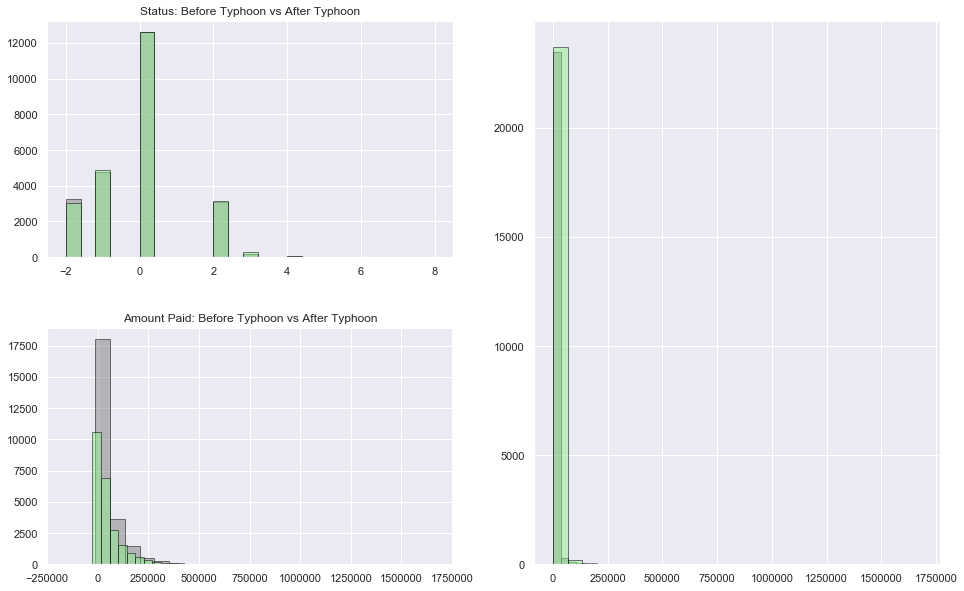

In [19]:
cols = ['default','STAT_JUL','STAT_AUG''BILL_JUL','BILL_AUG','PAID_JUL','PAID_AUG']
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(df['STAT_JUL'], bins = 25, label ='Status July', alpha = .50,edgecolor= 'black',color ='grey')
ax1.hist(df['STAT_AUG'], bins = 25, label = 'Status August', alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax1.set_title('Status: Before Typhoon vs After Typhoon')

ax2 = fig.add_subplot(223)
ax2.hist(df['BILL_JUL'], bins = 25, label ='Bill July', alpha = .50,edgecolor= 'black',color ='grey')
ax2.hist(df['BILL_AUG'], bins = 25, label = 'Bill August', alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax2.set_title('Amount of Bill: Before Typhoon vs After Typhoon')

ax3 = fig.add_subplot(122)
ax3.hist(df['PAID_JUL'], bins = 25, label ='Paid July', alpha = .50,edgecolor= 'black',color ='grey')
ax3.hist(df['PAID_AUG'], bins = 25, label = 'Paid August', alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax2.set_title('Amount Paid: Before Typhoon vs After Typhoon')

plt.show()

Target Variable
default
0    18691
1     5308
Name: default, dtype: int64


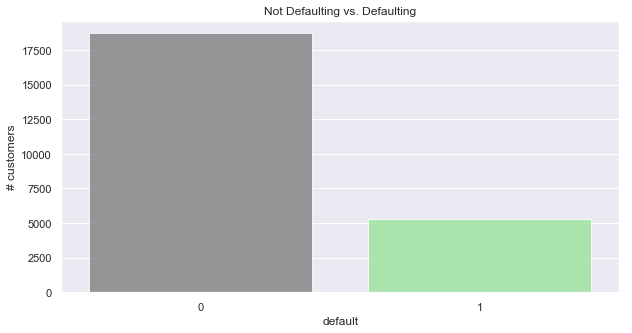

In [15]:
# Default Payment
print('Target Variable')
print(df.groupby(['default'])['default'].count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['default'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Not Defaulting vs. Defaulting')
plt.ylabel('# customers')
plt.show()

In [ ]:
import seaborn as sns
import pandas as pd

def r(df):
    return df.loc[df.name].reset_index(drop=True)

data = df.mean().groupby(level=0).apply(r) \
         .rename_axis(['grp', 'cat']).reset_index(name='mu')

ax = sns.barplot(x='grp', y='mu', hue='cat', data=data)

ax.legend_.remove()
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + .05, height + 1, df.columns.levels[1][i])

In [ ]:
# Identify numeric features
print('Continuous Variables')
print(titanic[['Age','Fare']].describe().transpose())
print('--'*40)
print('Discrete Variables')
print(titanic.groupby('Pclass').Pclass.count())
print(titanic.groupby('SibSp').SibSp.count())
print(titanic.groupby('Parch').Parch.count())

# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(321)
ax1.hist(titanic['Pclass'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Pclass', fontsize = 15)
ax1.set_ylabel('# Passengers',fontsize = 15)
ax1.set_title('Passenger Class',fontsize = 15)

ax2 = fig.add_subplot(323)
ax2.hist(titanic['Age'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Age',fontsize = 15)
ax2.set_ylabel('# Passengers',fontsize = 15)
ax2.set_title('Age of Passengers',fontsize = 15)

ax3 = fig.add_subplot(325)
ax3.hist(titanic['SibSp'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('SibSp',fontsize = 15)
ax3.set_ylabel('# Passengers',fontsize = 15)
ax3.set_title('Passengers with Spouses or Siblings',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(titanic['Parch'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Parch',fontsize = 15)
ax4.set_ylabel('# Passengers',fontsize = 15)
ax4.set_title('Passengers with Children',fontsize = 15)

ax5 = fig.add_subplot(224)
ax5.hist(titanic['Fare'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Fare',fontsize = 15)
ax5.set_ylabel('# Passengers',fontsize = 15)
ax5.set_title('Ticket Fare',fontsize = 15)

plt.show()